In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from plain_net.PlainNet import PlainNet

In [2]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_dataset_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [4]:
model = PlainNet([3, 64, 64, 64 2])

In [5]:
model.train_n_epochs(train_loader=train_loader, n_epochs=1000, lr=0.001, verbose=True)

Epoch 0: loss 0.28298649191856384
Epoch 100: loss 0.0003698464424815029
Epoch 200: loss 0.00014014999032951891
Epoch 300: loss 0.0001480008359067142
Epoch 400: loss 0.00017051224131137133
Epoch 500: loss 0.00012570235412567854
Epoch 600: loss 8.593557868152857e-05
Epoch 700: loss 0.00016494188457727432
Epoch 800: loss 5.3931122238282114e-05
Epoch 900: loss 8.679668826516718e-05


In [6]:
y_pred = model(test_data.x).detach().numpy()

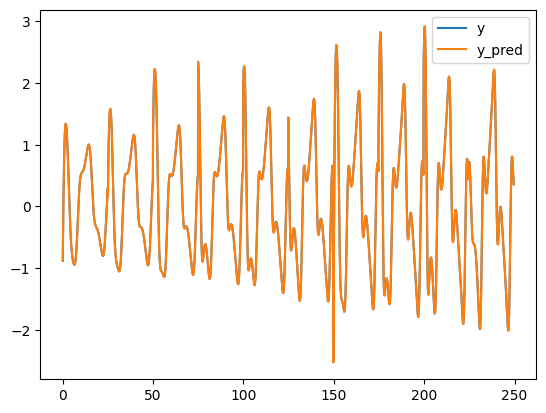

In [7]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [8]:
for layer in model.layers:
    print(layer.weight.data)

tensor([[-5.8314e-01, -2.8022e-01,  6.2590e-01],
        [-3.4032e-01, -8.1866e-01,  7.4366e-02],
        [ 9.7606e-01,  1.1934e-01,  4.2198e-02],
        [-4.7041e-01, -5.5010e-01, -1.2025e-01],
        [-1.8731e-01,  8.7946e-02, -1.7233e-01],
        [ 1.9758e-01, -2.4848e-01,  5.3011e-01],
        [-5.6731e-01, -2.0997e-01, -4.7506e-01],
        [ 6.3383e-01, -2.5802e-01, -3.3499e-01],
        [-1.1353e+00, -2.0803e-01,  2.5245e-01],
        [ 1.0870e-01,  2.5836e-01, -6.7606e-01],
        [ 1.8566e-01,  4.2572e-01, -1.2060e-01],
        [-6.5877e-01, -2.8712e-02,  3.4357e-01],
        [-7.3529e-01,  3.3604e-03, -3.6854e-02],
        [ 5.8395e-01, -1.6507e-01, -2.9929e-01],
        [-9.7464e-01,  5.0998e-01,  6.4758e-01],
        [-4.4604e-01,  2.5101e-01, -5.2359e-01],
        [ 1.1970e+00, -2.1950e-01,  1.5386e-01],
        [-1.1007e+00,  7.1032e-02,  1.0812e-01],
        [-4.9207e-01, -7.5081e-01,  1.3546e-01],
        [ 7.6866e-03, -3.6655e-01, -2.4604e-01],
        [ 9.6440e-01